In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit_ibm_runtime

In [ ]:
!pip install pylatexenc

In [ ]:
import matplotlib.pyplot as plt
import qiskit
import pylatexenc

In [ ]:
from qiskit import QuantumCircuit

## Quantum Circuit ->
1 Qubit System

In [ ]:
circuit = QuantumCircuit(1, 1)

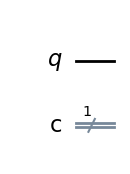

In [ ]:
circuit.draw('mpl')

In [ ]:
circuit.x(0)

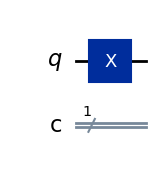

In [ ]:
circuit.draw('mpl')

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
Statevector.from_instruction(circuit)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Measurement

In [ ]:
circuit.measure(0,0)

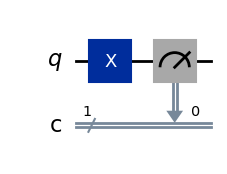

In [ ]:
circuit.draw('mpl')

In [ ]:
!pip install qiskit_aer

In [ ]:
from qiskit_aer import Aer

In [ ]:
from qiskit.visualization import plot_histogram

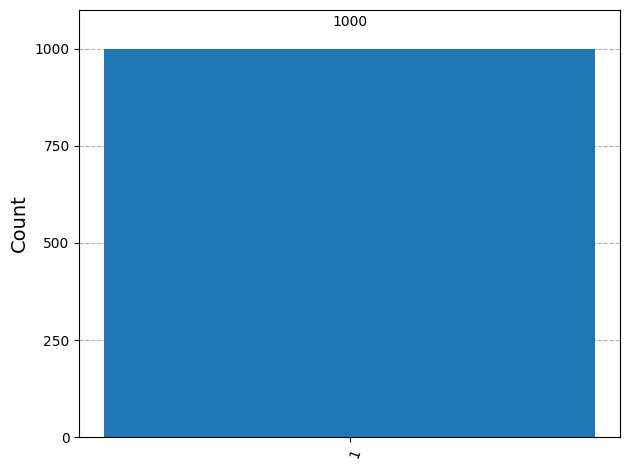

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit, shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

In [ ]:
from qiskit.transpiler import generate_preset_pass_manager

In [ ]:
from qiskit_ibm_runtime import Sampler

In [ ]:
from qiskit_ibm_runtime import Session

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
service = QiskitRuntimeService.save_account(
    token="oelMxEhQNiHqszrPGRh3IbNg9iMj67-tD88LsI1COwY7",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/cccd6a0d66014c88bba0568bcfb0a559:f759b0ba-e0ba-4c32-8498-7566ed8f728d::",
    plans_preference=['open'],
    region="us-east",
    name="Harshit Agarwal",
    set_as_default=True,
    overwrite=True,
)

In [ ]:
service = QiskitRuntimeService()

In [ ]:
print(service)

<QiskitRuntimeService>


In [ ]:
backend_real = service.least_busy(simulator=False,operational=True)

In [ ]:
backend_real

<IBMBackend('ibm_brisbane')>

In [ ]:
pm_real = generate_preset_pass_manager(backend=backend_real, optimization_level=0)

In [ ]:
transpiled_circuit = pm_real.run(circuit)

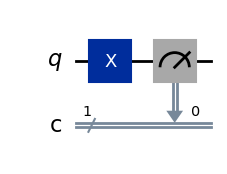

In [ ]:
circuit.draw('mpl')

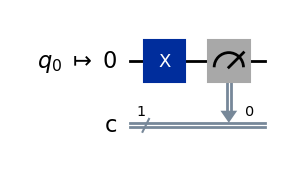

In [ ]:
transpiled_circuit.draw('mpl',idle_wires=False)

In [ ]:
sampler_real = Sampler(mode=backend_real)
job_sampler = sampler_real.run([(transpiled_circuit)],shots=1024)

In [ ]:
sampler_real

In [ ]:
print(f">>> Job Id: {job_sampler.job_id()}")
print(f">>> Job Id: {job_sampler.status()}")

>>> Job Id: d2urfn0ocacs73ai26j0
>>> Job Id: DONE


In [ ]:
result_sampler = job_sampler.result()
result_sampler

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-07 16:50:42', stop='2025-09-07 16:50:42', size=1024>)])}, 'version': 2})

In [ ]:
counts_real = result_sampler[0].data.c.get_counts()

In [ ]:
counts_real

{'1': 987, '0': 37}

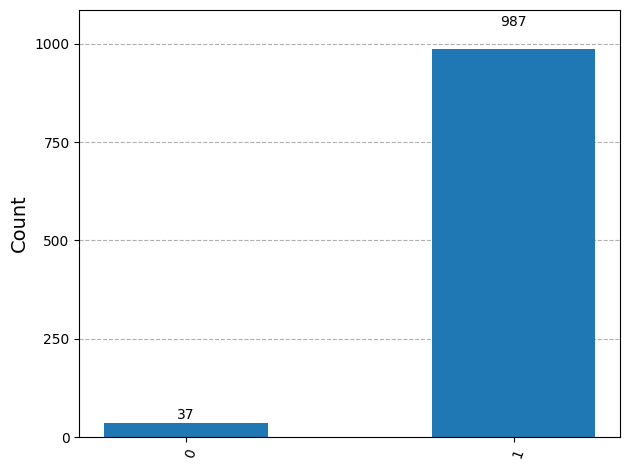

In [ ]:
plot_histogram(counts_real)

# **Implementation of GATES**